## Finding Radiance with Blackbody and Vendor Supplied RSR Data

In [ ]:
#Parker Mei pmm4630@rit.edu
#10/29/2024
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import math
import scipy.integrate as integrate

In [ ]:
#Enter CSV Path of the RSR File
csv_path = '/content/flir_rsr.csv'

In [ ]:
#Convert the csv into a pandas dataframe
Datasheet = pd.read_csv(csv_path, sep=',', header=0)

#Convert wavelengths into np array
wavelength = Datasheet['Wavelength (µm)']
wavelengths = wavelength.to_numpy()
#Convert rsr into np array
rsr = Datasheet['Relative response']
rsr = rsr.to_numpy()

Text(0.5, 1.0, 'Relative Response as a function of Wavelength')

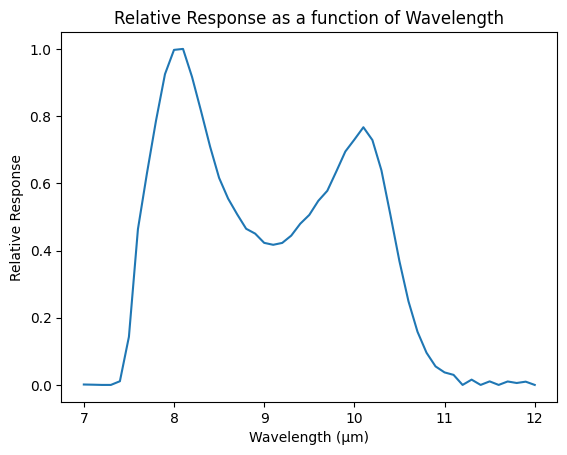

In [ ]:
#Plot the RSR as a function of wavelength
plt.plot(wavelengths, rsr)
plt.xlabel('Wavelength (µm)')
plt.ylabel('Relative Response')
plt.title('Relative Response as a function of Wavelength')

In [ ]:
def planck_exitance(wavelength, temperature):
    """
    Calculate the exitance of a blackbody using Planck's law.

    Parameters:
    wavelength
    temperature

    Returns:
    Exitance
    """
    wavelength = wavelength * 1e-6
    # Physical constants
    h = 6.62607015e-34
    c = 299792458
    k = 1.380649e-23

    c1 = 2 * np.pi * h * c**2
    c2 = h * c / (k * temperature * wavelength)

    # Planck's law for spectral radiant exitance
    numerator = c1
    denominator = wavelength**5 * (np.exp(c2) - 1)

    return (numerator / denominator) * 10e-7

#Test using 8 micron and 200 Kelvin parameters
planck_exitance(8, 200)

1.4202049216516925

In [ ]:
def planck_radiance(wavelength, temperature):
    """
    Calculate the radiance of a blackbody using Planck's law.

    Parameters:
    wavelength
    temperature

    Returns:
    Radiance
    """
    wavelength = wavelength * 1e-6
    # Physical constants
    h = 6.62607015e-34
    c = 299792458
    k = 1.380649e-23

    c1 = 2 * h * c**2
    c2 = h * c / (k * temperature * wavelength)

    # Planck's law for spectral radiant exitance
    numerator = c1
    denominator = wavelength**5 * (np.exp(c2) - 1)

    return numerator / denominator *10e-7

#Test using 8 micron and 200 Kelvin parameters
planck_radiance(8, 200)

0.4520652669686097

In [ ]:
def band_radiance(wavelengths,rsr, temperature):
  """
  Calculate the band radiance of a blackbody using Planck's law.

  Parameters:
  wavelengths
  rsr
  temperature in C

  Returns:
  Band Radiance over entire sensor

  """
  temp = temperature + 273.15
  band_radiance = np.zeros(len(wavelengths))
  for i in range(len(wavelengths)):
    band_radiance[i] = planck_radiance(wavelengths[i], temp) * rsr[i]

  total_radiance = integrate.trapezoid(band_radiance, wavelengths)

  return total_radiance

print(band_radiance(wavelengths, rsr, 32))

20.448577839957565
